<a href="https://colab.research.google.com/github/Sciform/sciform-hwz-ai-in-controlling/blob/main/lecture_2/2_2_ts_02_forecasting_naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive forecasting

Naive forecasting helps to quickly get a pretty accurate baseline

## Setup

In [ ]:
!pip install tensorflow==2.16.1

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

import keras

# Print TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# Print Keras version
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.16.1
Keras version: 3.3.3


### Define plot functions

In [20]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    
def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
  
def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)
    
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

## Create an additive time series

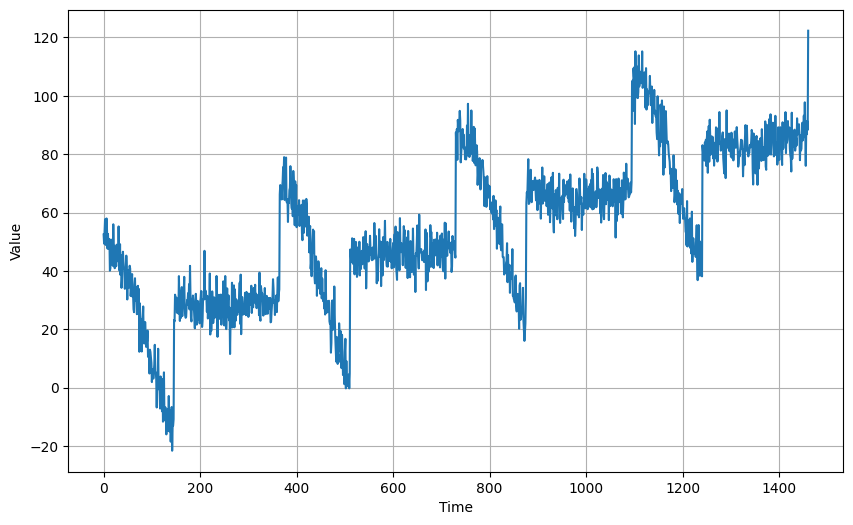

In [21]:
time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

All right, this looks realistic enough for now. Let's try to forecast it. We will split it into two periods: the training period and the validation period. (In many cases, you would also want to have a test period. We omit the additional independent test here). The split will be at time step 1000.

In [22]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

## Naive Forecast

For the naive forecast, we simply take the value from the previous time step as a forecast value.

In [23]:
# series

In [24]:
# naive forecast = [split_time - 1 : t - 1]
naive_forecast = series[split_time - 1:-1]
# naive_forecast

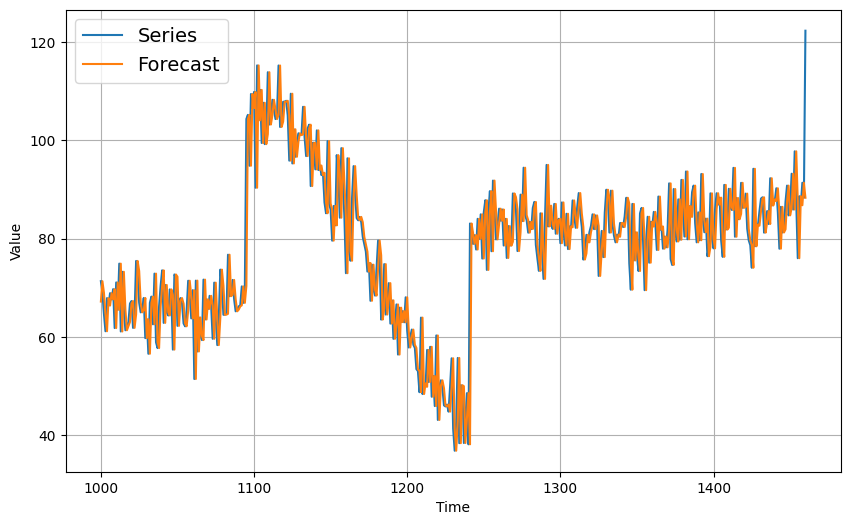

In [25]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, label="Series")
plot_series(time_valid, naive_forecast, label="Forecast")

Let's zoom in on the start of the validation period:

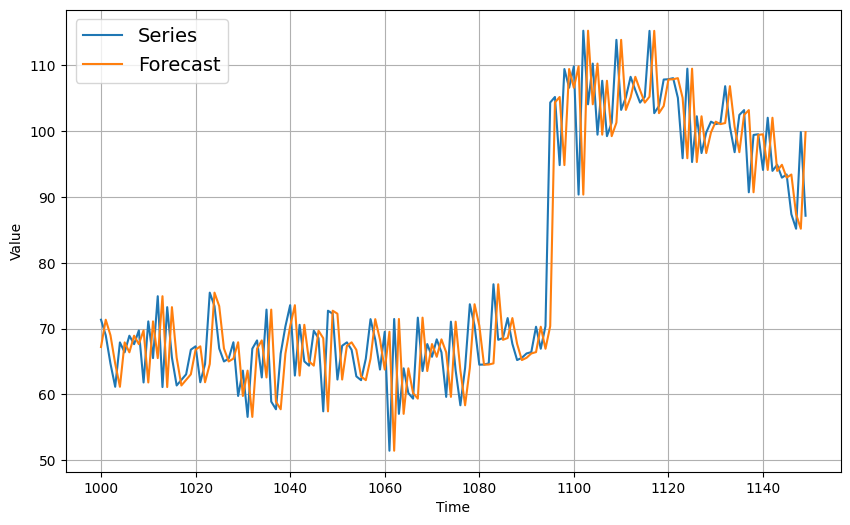

In [26]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150, label="Series")
plot_series(time_valid, naive_forecast, start=0, end=150, label="Forecast")

You can see that the naive forecast lags 1 step behind the time series.

Now let's compute the **mean absolute error** between the forecasts and the predictions in the validation period:

In [27]:
errors = naive_forecast - x_valid
abs_errors = np.abs(errors)
mae = abs_errors.mean()
mae

5.9379085153216735

In [28]:
print(f"The MAE is = {keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy()}")

The MAE is = 5.9379085153216735


In [29]:
print(f"The MSE is = {keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy()}")

The MSE is = 61.82753366856369


In [30]:
# root mean square error
print(f"The RMSE is = {np.sqrt(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())}")

The RMSE is = 7.863048624329096


In [37]:
mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()
mape = mape_metric(x_valid, naive_forecast).numpy()
print(f"The MAPE is = {mape} %")


The MAPE is = 7.845698833465576 %


### This is our baseline for more sophisticated approaches

In [38]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# Source: https://github.com/tensorflow/examples